In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
df = pd.read_csv("Employees.csv")
df.head()

,NAME,JOB TITLE,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,$81000.00,$73862.00
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,$74628.00,$74628.00
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,FLEET MANAGEMNT,$77280.00,$70174.00
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,$96276.00,$96276.00
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,WATER MGMNT,$84032.00,$76627.00


In [53]:
df.shape

(34218, 5)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34218 entries, 0 to 34217
Data columns (total 5 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   NAME                                     34218 non-null  object
 1   JOB TITLE                                34218 non-null  object
 2   DEPARTMENT                               34218 non-null  object
 3   EMPLOYEE ANNUAL SALARY                   34218 non-null  object
 4   ESTIMATED ANNUAL SALARY MINUS FURLOUGHS  34218 non-null  object
dtypes: object(5)
memory usage: 1.3+ MB


In [55]:
df.describe()

,NAME,JOB TITLE,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
count,34218,34218,34218,34218,34218
unique,33908,1124,39,1028,1088
top,"PEREZ, JOSE A",POLICE OFFICER,POLICE,$77238.00,$77238.00
freq,4,10918,14147,3028,3028


In [56]:
df.isnull().sum()

NAME                                       0
JOB TITLE                                  0
DEPARTMENT                                 0
EMPLOYEE ANNUAL SALARY                     0
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS    0
dtype: int64

In [57]:
df.dtypes

NAME                                       object
JOB TITLE                                  object
DEPARTMENT                                 object
EMPLOYEE ANNUAL SALARY                     object
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS    object
dtype: object

In [58]:
df["ESTIMATED ANNUAL SALARY MINUS FURLOUGHS"] = df["ESTIMATED ANNUAL SALARY MINUS FURLOUGHS"].str.replace(r"$","")

In [59]:
df["EMPLOYEE ANNUAL SALARY"] = df["EMPLOYEE ANNUAL SALARY"].str.replace(r"$","")

In [60]:
df.head()

,NAME,JOB TITLE,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,81000.00,73862.00
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,74628.00,74628.00
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,FLEET MANAGEMNT,77280.00,70174.00
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,96276.00,96276.00
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,WATER MGMNT,84032.00,76627.00


In [61]:
df["ESTIMATED ANNUAL SALARY MINUS FURLOUGHS"] = pd.to_numeric(df["ESTIMATED ANNUAL SALARY MINUS FURLOUGHS"])
df["EMPLOYEE ANNUAL SALARY"] = pd.to_numeric(df["EMPLOYEE ANNUAL SALARY"])

In [62]:
df.dtypes

NAME                                        object
JOB TITLE                                   object
DEPARTMENT                                  object
EMPLOYEE ANNUAL SALARY                     float64
ESTIMATED ANNUAL SALARY MINUS FURLOUGHS    float64
dtype: object

In [63]:
dif = df["EMPLOYEE ANNUAL SALARY"] - df["ESTIMATED ANNUAL SALARY MINUS FURLOUGHS"]
dif.head()

0    7138.0
1       0.0
2    7106.0
3       0.0
4    7405.0
dtype: float64

In [64]:
df = pd.concat([df,dif], axis=1)
df.head()

,NAME,JOB TITLE,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS,0
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,81000.0,73862.0,7138.0
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,74628.0,74628.0,0.0
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,FLEET MANAGEMNT,77280.0,70174.0,7106.0
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,96276.0,96276.0,0.0
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,WATER MGMNT,84032.0,76627.0,7405.0


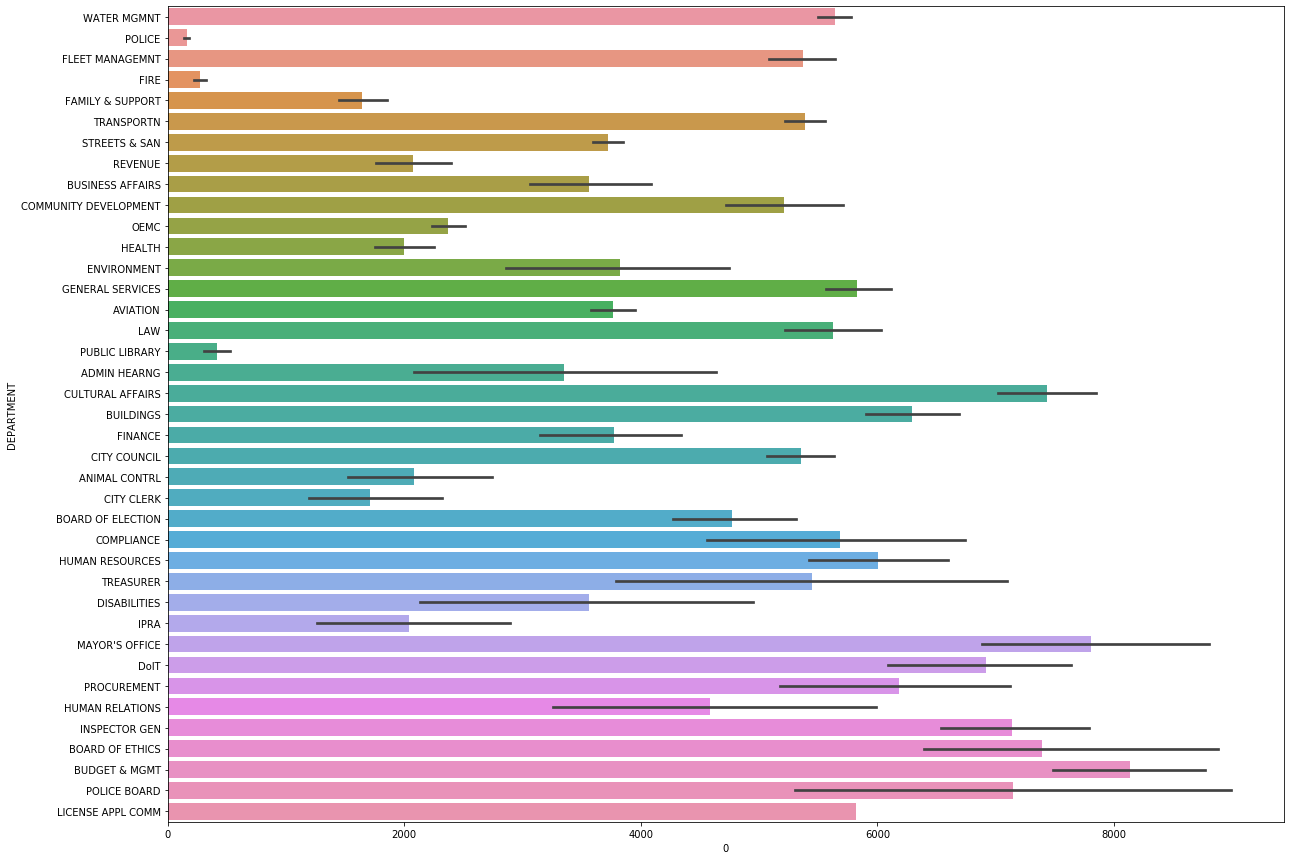

In [65]:
fig_dims = (20,15)
fig, ax=plt.subplots(figsize=fig_dims)
sns.barplot(y=df["DEPARTMENT"],x =df[0],data=df,ax=ax )

Clearly we can see that Police and Fire dept have lost the least part of salaries because of leaves

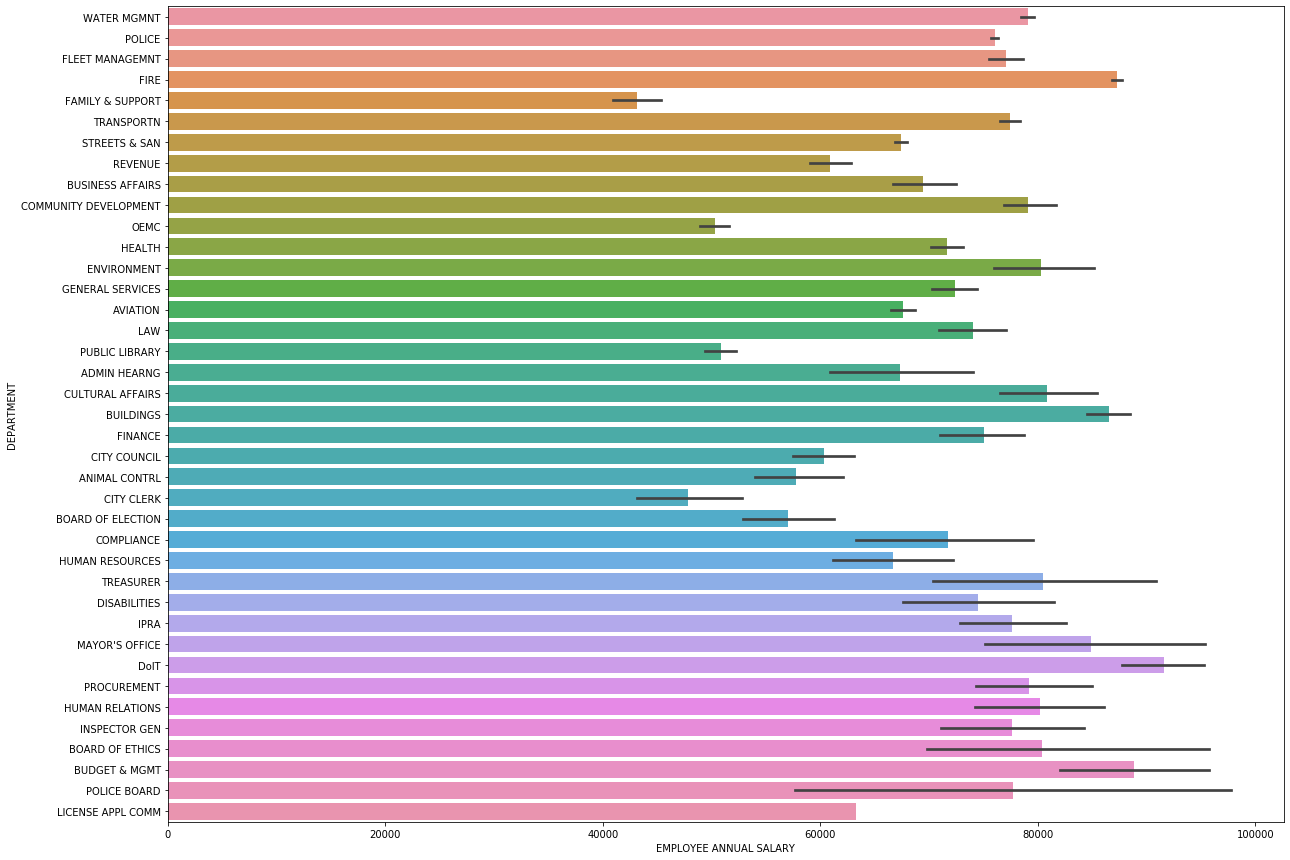

In [66]:
fig_dims = (20,15)
fig, ax=plt.subplots(figsize=fig_dims)
sns.barplot(y=df["DEPARTMENT"],x =df["EMPLOYEE ANNUAL SALARY"],data=df,ax=ax )

From the above barplot, clearly the highest annual salary goes to DoIT and the least goes to Family and Support Department

In [67]:
df.drop("NAME",axis=1,inplace=True)

In [68]:
df.head()

,JOB TITLE,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS,0
0,WATER RATE TAKER,WATER MGMNT,81000.0,73862.0,7138.0
1,POLICE OFFICER,POLICE,74628.0,74628.0,0.0
2,CHIEF CONTRACT EXPEDITER,FLEET MANAGEMNT,77280.0,70174.0,7106.0
3,CIVIL ENGINEER IV,WATER MGMNT,96276.0,96276.0,0.0
4,ELECTRICAL MECHANIC,WATER MGMNT,84032.0,76627.0,7405.0


In [69]:
pd.get_dummies(df["DEPARTMENT"])

,ADMIN HEARNG,ANIMAL CONTRL,AVIATION,BOARD OF ELECTION,BOARD OF ETHICS,BUDGET & MGMT,BUILDINGS,BUSINESS AFFAIRS,CITY CLERK,CITY COUNCIL,...,OEMC,POLICE,POLICE BOARD,PROCUREMENT,PUBLIC LIBRARY,REVENUE,STREETS & SAN,TRANSPORTN,TREASURER,WATER MGMNT
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34213,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
34215,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
dept = pd.get_dummies(df["DEPARTMENT"])

In [71]:
pd.get_dummies(df["JOB TITLE"])

,A/MGR COM SVC-ELECTIONS,A/MGR OF MIS-ELECTIONS,A/MGR WAREHOUSE-ELECTIONS,A/SUPRV REDISTRICTING,ACCIDENT ADJUSTER,ACCOUNTANT I,ACCOUNTANT II,ACCOUNTANT III,ACCOUNTANT IV,ACCOUNTING TECHNICIAN I,...,WATER QUALITY MANAGER,WATER RATE TAKER,WATER RESEARCH SPECIALIST,WEB AUTHOR,WEIGHMASTER,WINDOW WASHER,YOUTH SERVICES COORD,ZONING ADMINISTRATOR,ZONING INVESTIGATOR,ZONING PLAN EXAMINER
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34216,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
jt = pd.get_dummies(df["JOB TITLE"])

In [73]:
df = pd.concat([df,dept,jt],axis=1)
df.head()

,JOB TITLE,DEPARTMENT,EMPLOYEE ANNUAL SALARY,ESTIMATED ANNUAL SALARY MINUS FURLOUGHS,0,ADMIN HEARNG,ANIMAL CONTRL,AVIATION,BOARD OF ELECTION,BOARD OF ETHICS,...,WATER QUALITY MANAGER,WATER RATE TAKER,WATER RESEARCH SPECIALIST,WEB AUTHOR,WEIGHMASTER,WINDOW WASHER,YOUTH SERVICES COORD,ZONING ADMINISTRATOR,ZONING INVESTIGATOR,ZONING PLAN EXAMINER
0,WATER RATE TAKER,WATER MGMNT,81000.0,73862.0,7138.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,POLICE OFFICER,POLICE,74628.0,74628.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHIEF CONTRACT EXPEDITER,FLEET MANAGEMNT,77280.0,70174.0,7106.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CIVIL ENGINEER IV,WATER MGMNT,96276.0,96276.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ELECTRICAL MECHANIC,WATER MGMNT,84032.0,76627.0,7405.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df.drop(["JOB TITLE","DEPARTMENT","ESTIMATED ANNUAL SALARY MINUS FURLOUGHS",0],axis=1,inplace=True)
df.head()

,EMPLOYEE ANNUAL SALARY,ADMIN HEARNG,ANIMAL CONTRL,AVIATION,BOARD OF ELECTION,BOARD OF ETHICS,BUDGET & MGMT,BUILDINGS,BUSINESS AFFAIRS,CITY CLERK,...,WATER QUALITY MANAGER,WATER RATE TAKER,WATER RESEARCH SPECIALIST,WEB AUTHOR,WEIGHMASTER,WINDOW WASHER,YOUTH SERVICES COORD,ZONING ADMINISTRATOR,ZONING INVESTIGATOR,ZONING PLAN EXAMINER
0,81000.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,74628.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,77280.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,96276.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,84032.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
X = df.drop("EMPLOYEE ANNUAL SALARY", axis=1)
y = df["EMPLOYEE ANNUAL SALARY"]

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20,random_state=0)
lr = LinearRegression().fit(X_train,y_train)
predlr = lr.predict(X_test)
print("R2 Score {}".format(r2_score(y_test,predlr)))
print("mean squared error {}".format(mean_squared_error(y_test,predlr)))

R2 Score -3.783999967105664e+19
mean squared error 1.988426651318228e+28


In [78]:
from sklearn.externals import joblib
joblib.dump(lr,'salary_reg.pkl')

['salary_reg.pkl']